In [49]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import json
file_path = r"C:\Users\Dell\Downloads\DS-Assignment Dataset and instructions\DS-Assignment Dataset and instructions\P1- BankStatements.json"
with open(file_path, 'r') as file:
    data_dict = json.load(file)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
account_info = data_dict['Account']
profile_info = account_info['Profile']['Holders']['Holder']
summary_info = account_info['Summary']
transactions = account_info['Transactions']['Transaction']

# main dataframe
transactions_df = pd.DataFrame(transactions)

In [4]:
transactions_df.head()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.80,2023-06-27T09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
1,DEBIT,CARD,170.0,2010.80,2023-06-28T09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
2,DEBIT,CARD,500.0,1510.80,2023-07-26T10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
4,DEBIT,ATM,1000.0,525.80,2023-08-07T17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA


In [5]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   type                  985 non-null    object
 1   mode                  985 non-null    object
 2   amount                985 non-null    object
 3   currentBalance        985 non-null    object
 4   transactionTimestamp  985 non-null    object
 5   valueDate             985 non-null    object
 6   txnId                 985 non-null    object
 7   narration             985 non-null    object
 8   reference             985 non-null    object
dtypes: object(9)
memory usage: 69.4+ KB


In [6]:
transactions_df['transactionTimestamp'] = transactions_df['transactionTimestamp'].astype(str)

In [7]:
from datetime import datetime, timedelta
def add_offset_to_timestamp(timestamp_str):
    datetime_obj = datetime.fromisoformat(timestamp_str[:-6]) 
    offset = timedelta(hours=5, minutes=30)
    datetime_with_offset = datetime_obj + offset
    return datetime_with_offset.strftime('%Y-%m-%d %H:%M:%S')

In [8]:
transactions_df['transactionTimestamp'] = transactions_df['transactionTimestamp'].apply(add_offset_to_timestamp)

In [9]:
transactions_df['type'] = transactions_df['type'].astype('string')
transactions_df['mode'] = transactions_df['mode'].astype('string')
transactions_df['amount'] = transactions_df['amount'].astype(float)
transactions_df['currentBalance'] = transactions_df['currentBalance'].astype(float)
transactions_df['transactionTimestamp'] = pd.to_datetime(transactions_df['transactionTimestamp'])
transactions_df['valueDate'] = pd.to_datetime(transactions_df['valueDate'])

In [10]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   type                  985 non-null    string        
 1   mode                  985 non-null    string        
 2   amount                985 non-null    float64       
 3   currentBalance        985 non-null    float64       
 4   transactionTimestamp  985 non-null    datetime64[ns]
 5   valueDate             985 non-null    datetime64[ns]
 6   txnId                 985 non-null    object        
 7   narration             985 non-null    object        
 8   reference             985 non-null    object        
dtypes: datetime64[ns](2), float64(2), object(3), string(2)
memory usage: 69.4+ KB


In [11]:
transactions_df.isna().sum()

type                    0
mode                    0
amount                  0
currentBalance          0
transactionTimestamp    0
valueDate               0
txnId                   0
narration               0
reference               0
dtype: int64

In [12]:
# Date of first and Last Transaction
print(f"First Transaction : {min(transactions_df['transactionTimestamp'])}")
print(f"Last Transaction  : {max(transactions_df['transactionTimestamp'])}")

First Transaction : 2023-06-27 15:10:19
Last Transaction  : 2024-05-30 19:08:20


In [13]:
# total number of trnsactions over the year
print(f"Total Number of Transactions : {transactions_df.shape[0]}")

Total Number of Transactions : 985


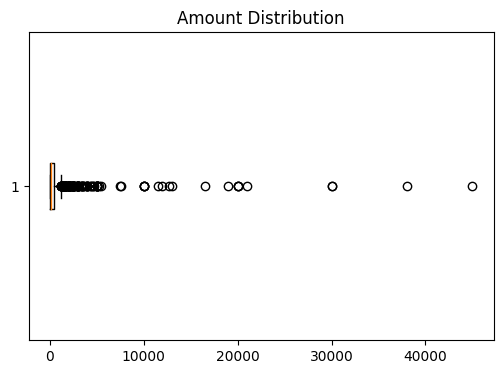

In [15]:
plt.figure(figsize=(6,4))
plt.boxplot(transactions_df['amount'], vert=False)
plt.title("Amount Distribution")
plt.show()

In [16]:
transactions_df['amount'].describe()

count      985.000000
mean       855.492802
std       3007.515100
min          1.000000
25%         40.000000
50%        160.000000
75%        500.000000
max      45000.000000
Name: amount, dtype: float64

In [17]:
# small and large transactions 

lower_threshold, upper_threshold = transactions_df['amount'].quantile([0.50, 0.75])
print(f"lower threshold : {lower_threshold}")
print(f"upper threshold : {upper_threshold}")

lower threshold : 160.0
upper threshold : 500.0


In [18]:
# distribution of transaction amounts 
small_transactions = 100*(len(transactions_df[transactions_df['amount'] <= lower_threshold])/len(transactions_df))
large_transactions = 100*(len(transactions_df[transactions_df['amount'] >= upper_threshold])/len(transactions_df))
print(f"Percentage of Small Transactions : {small_transactions : .2f} %")
print(f"Percentage of Large Transactions : {large_transactions : .2f} %")

Percentage of Small Transactions :  50.25 %
Percentage of Large Transactions :  30.25 %


In [20]:
# Frequency of different transaction types 
print("Frequency of transaction types:")
print(transactions_df['type'].value_counts())

Frequency of transaction types:
DEBIT     695
CREDIT    290
Name: type, dtype: Int64


In [21]:
transactions_df['currentBalance'].describe()

count      985.000000
mean      5901.308721
std       8670.950436
min          0.800000
25%       1174.800000
50%       2723.110000
75%       5834.110000
max      58450.800000
Name: currentBalance, dtype: float64

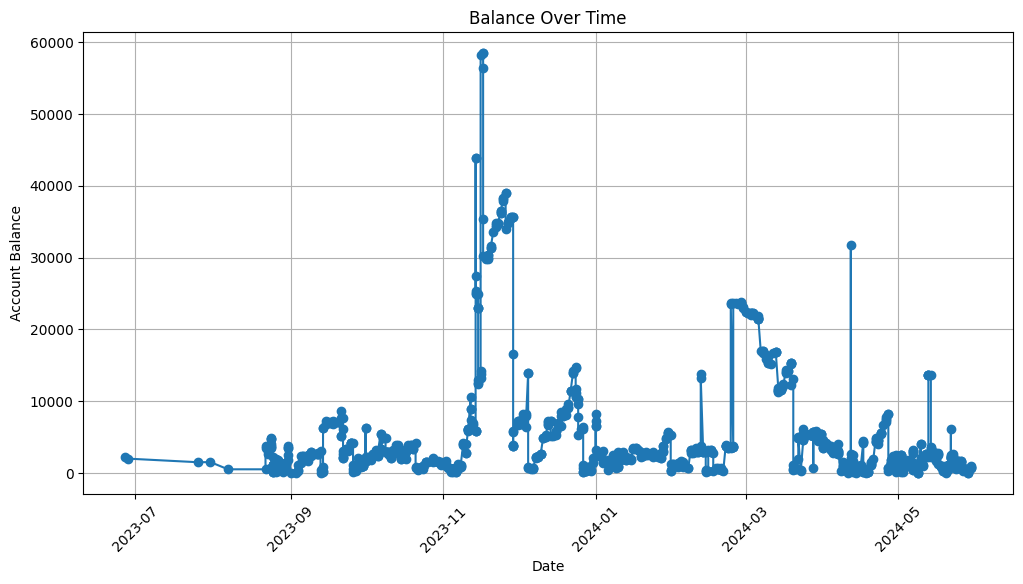

In [22]:
# account balance over time analysis
plt.figure(figsize=(12, 6))
plt.plot(transactions_df['valueDate'], transactions_df['currentBalance'], marker='o', linestyle='-')
plt.title('Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [23]:
transactions_df['balance_dif'] = transactions_df['currentBalance'].diff()

In [24]:
transactions_df['balance_dif'] = abs(transactions_df['balance_dif'])

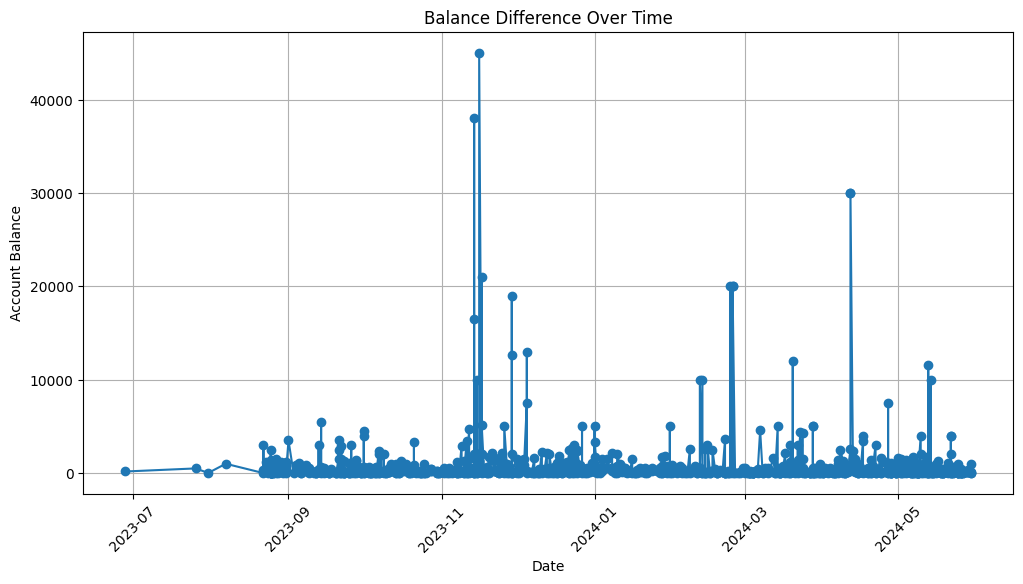

In [25]:
# account balance over time analysis
plt.figure(figsize=(12, 6))
plt.plot(transactions_df['valueDate'], transactions_df['balance_dif'], marker='o', linestyle='-')
plt.title('Balance Difference Over Time')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [31]:
print(f"Transactions with difference more than 10000 : {len(transactions_df[transactions_df['balance_dif'] > 10000])}")

Transactions with difference more than 10000 : 14


In [32]:
significant_changes = transactions_df[transactions_df['balance_dif'] > 10000]
print("Periods with significant balance changes:")
print(significant_changes[['valueDate', 'currentBalance', 'balance_dif']])

Periods with significant balance changes:
     valueDate  currentBalance  balance_dif
275 2023-11-14        43892.80      37999.0
277 2023-11-14        27391.80      16500.0
291 2023-11-16        58180.80      45000.0
295 2023-11-17        35400.80      21000.0
332 2023-11-29        16625.80      19000.0
333 2023-11-29         3925.80      12700.0
353 2023-12-05          865.80      13000.0
570 2024-02-24        23483.91      20000.0
572 2024-02-25         3683.91      20000.0
576 2024-02-25        23664.91      20000.0
648 2024-03-20         1119.11      12000.0
743 2024-04-12        31701.21      30000.0
744 2024-04-12         1701.21      30000.0
884 2024-05-13        13704.31      11530.0


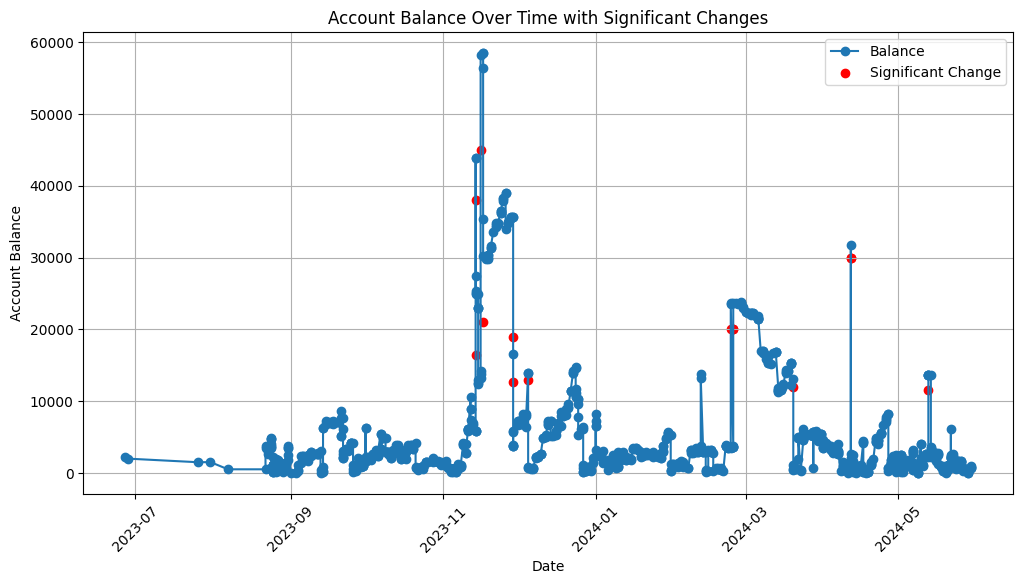

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(transactions_df['valueDate'], transactions_df['currentBalance'], marker='o', linestyle='-', label='Balance')
plt.scatter(significant_changes['valueDate'], significant_changes['balance_dif'], color='red', label='Significant Change')
plt.title('Account Balance Over Time with Significant Changes')
plt.xlabel('Date')
plt.ylabel('Account Balance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [37]:
# lets mark some categories
def categorize_expense(narration):
    narration = narration.upper()
    if 'FILLING STATIO' in narration:
        return 'Fuel'
    elif any(keyword in narration for keyword in ['PAYTM', 'AMAZON', 'BHARATPE']):
        return 'E-commerce'
    elif 'ATM/CASH' in narration:
        return 'ATM Withdrawals'
    elif 'UPI' in narration:
        return 'UPI Transactions'
    elif 'NEFT' in narration:
        return 'Utility Payments'
    else:
        return 'Other'

In [38]:
transactions_df['Category'] = transactions_df['narration'].apply(categorize_expense)


In [39]:
# frequency of transactions per category 
cat_freq = transactions_df['Category'].value_counts()
cat_freq

UPI Transactions    629
E-commerce          160
Utility Payments    159
Other                30
Fuel                  4
ATM Withdrawals       3
Name: Category, dtype: int64

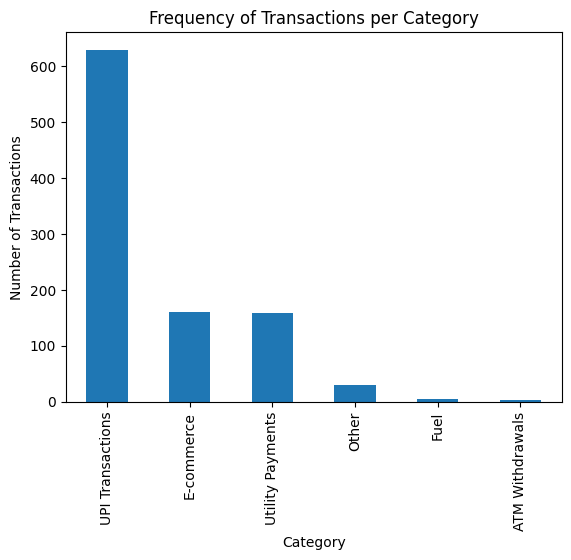

In [40]:
cat_freq.plot(kind='bar', title='Frequency of Transactions per Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.show()

In [41]:
# expenditure per cateogry 
cat_expense = transactions_df.groupby('Category')['amount'].sum()
cat_expense

Category
ATM Withdrawals      13500.00
E-commerce           58363.00
Fuel                   830.00
Other                68807.00
UPI Transactions    528729.90
Utility Payments    172430.51
Name: amount, dtype: float64

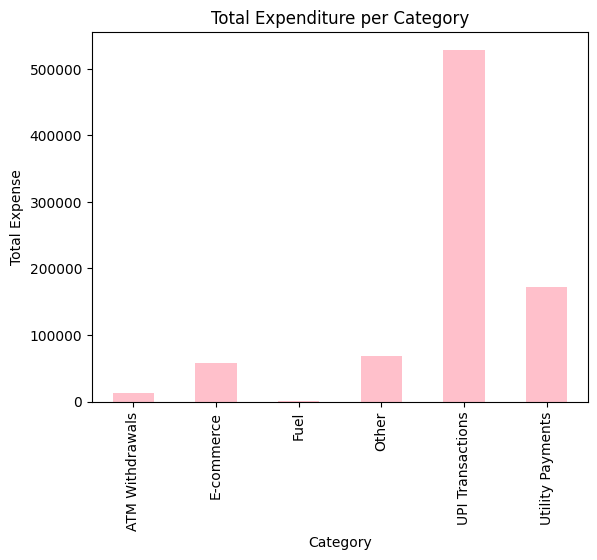

In [42]:
cat_expense.plot(kind='bar', title='Total Expenditure per Category', color='pink')
plt.xlabel('Category')
plt.ylabel('Total Expense')
plt.show()

In [43]:
income_df = transactions_df[transactions_df['type'] == "CREDIT"]
income_df.head()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,balance_dif,Category
3,CREDIT,OTHERS,15.0,1525.8,2023-08-06 16:40:38,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA,15.0,Other
6,CREDIT,UPI,3000.0,3524.8,2023-08-22 17:19:13,2023-08-22,S90667553,UPI/323441197152/114914/UPI/8795417446ybl/Paym,NA,3000.0,UPI Transactions
7,CREDIT,UPI,300.0,3824.8,2023-08-22 17:50:04,2023-08-22,S92051775,UPI/323457106254/122004/UPI/9264998949barodamp,NA,300.0,UPI Transactions
9,CREDIT,UPI,400.0,3024.8,2023-08-23 16:21:21,2023-08-23,S25232032,UPI/323567840697/105122/UPI/kimoroybl/Payment,NA,400.0,UPI Transactions
10,CREDIT,UPI,500.0,3524.8,2023-08-24 17:02:18,2023-08-24,S65206796,UPI/323602109737/113218/UPI/9701028466ibl/Paym,NA,500.0,UPI Transactions


In [44]:
def categorize_income(narration, mode):
    narration = narration.upper()
    mode = mode.upper()
    if 'NEFT' in narration:
        return 'Bank Transfer'
    elif 'UPI' in mode:
        return 'UPI Credit'
    else:
        return 'Other'

In [50]:
income_df['Category'] = income_df.apply(lambda row: categorize_income(row['narration'], row['mode']), axis=1)

In [46]:
income_source_frequency = income_df['Category'].value_counts()
income_source_amount = income_df.groupby('Category')['amount'].sum()

In [47]:
income_summary = pd.DataFrame({
    'Frequency': income_source_frequency,
    'Total Amount': income_source_amount
}).sort_values(by='Total Amount', ascending=False)

print("Income Source Summary - ")
print(income_summary)

Income Source Summary - 
               Frequency  Total Amount
UPI Credit           101     179333.00
Bank Transfer        159     172430.51
Other                 30      68807.00


In [51]:
income_df['valueDate'] = pd.to_datetime(income_df['valueDate'])
income_trend = income_df.groupby(income_df['valueDate'].dt.to_period('M')).agg({
    'amount': ['sum', 'mean', 'count']
}).rename(columns={'sum': 'Total', 'mean': 'Average', 'count': 'Count'})

print("\nIncome Patterns by Month:")
print(income_trend)


Income Patterns by Month:
              amount                   
               Total      Average Count
valueDate                              
2023-07        15.00    15.000000     1
2023-08     12664.00   550.608696    23
2023-09     22605.00   779.482759    29
2023-10     21487.00   671.468750    32
2023-11    115722.00  3403.588235    34
2023-12     37953.51  1186.047188    32
2024-01     22185.00   792.321429    28
2024-02     63724.00  3034.476190    21
2024-03     25420.00   977.692308    26
2024-04     58707.00  1779.000000    33
2024-05     40088.00  1293.161290    31


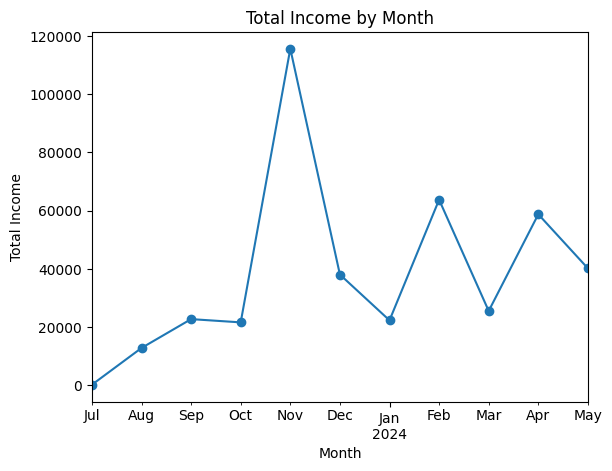

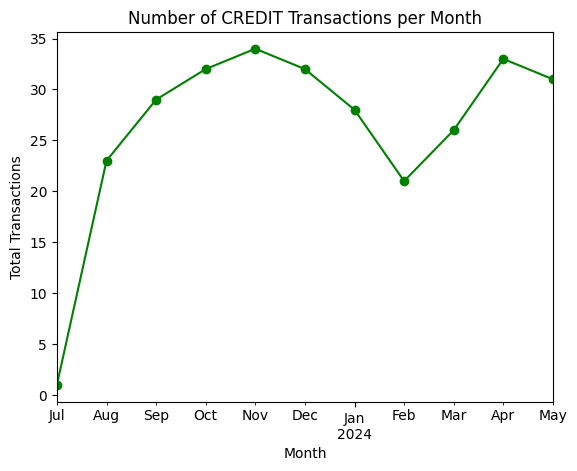

In [52]:
# income over time
income_trend['amount']['Total'].plot(kind='line', title='Total Income by Month', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Income')
plt.show()

income_trend['amount']['Count'].plot(kind='line', title='Number of CREDIT Transactions per Month', marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('Total Transactions')
plt.show()

In [53]:
# creating some thresholds
low_balance = 500.0
high_expenditure = 10000.0
suspicious = 20000.0

In [54]:
# for an sus transactions
sus_transacs = transactions_df[(transactions_df['amount'] > suspicious) ]

# for low balance
low_balance_transacs = transactions_df[transactions_df['currentBalance'] < low_balance]

# daily spendings
daily = transactions_df[transactions_df['type'] == 'DEBIT'].groupby(transactions_df['valueDate'].dt.date)['amount'].sum()

# high expenditure 
high_expenditure_transacs = transactions_df[(transactions_df['type'] == 'DEBIT') & (transactions_df['amount'] > high_expenditure) ]


In [55]:
print("Suspicious Transactions:")
print(sus_transacs[['amount', 'valueDate', 'txnId']])


Suspicious Transactions:
      amount  valueDate      txnId
275  37999.0 2023-11-14  S65593249
291  45000.0 2023-11-16   00707977
295  21000.0 2023-11-17  S82212459
743  30000.0 2024-04-12  S72310155
744  30000.0 2024-04-12  S72445629


In [56]:
print("LOW EXPENDITURE ALERT:")
print(low_balance_transacs[['amount', 'valueDate', 'txnId']])

LOW EXPENDITURE ALERT:
     amount  valueDate      txnId
26   1000.0 2023-08-25  S18720196
27     30.0 2023-08-25  S22642750
28     51.0 2023-08-25  S23309045
29      1.0 2023-08-26  S51405185
36   1499.0 2023-08-27  S80757332
..      ...        ...        ...
976   240.9 2024-05-29  S43796126
977   130.0 2024-05-29  S53022278
978   300.0 2024-05-29  S66468359
979   245.0 2024-05-29  S66551053
980    80.0 2024-05-29  S68913329

[85 rows x 3 columns]


In [57]:
print("HIGH EXPENDITURE ALERT:")
print(high_expenditure_transacs[['amount', 'valueDate', 'txnId']])

HIGH EXPENDITURE ALERT:
      amount  valueDate      txnId
277  16500.0 2023-11-14  S66498670
295  21000.0 2023-11-17  S82212459
332  19000.0 2023-11-29  S50294642
333  12700.0 2023-11-29  S52850056
353  13000.0 2023-12-05   S8245037
572  20000.0 2024-02-25  S77431539
648  12000.0 2024-03-20  S75496843
744  30000.0 2024-04-12  S72445629


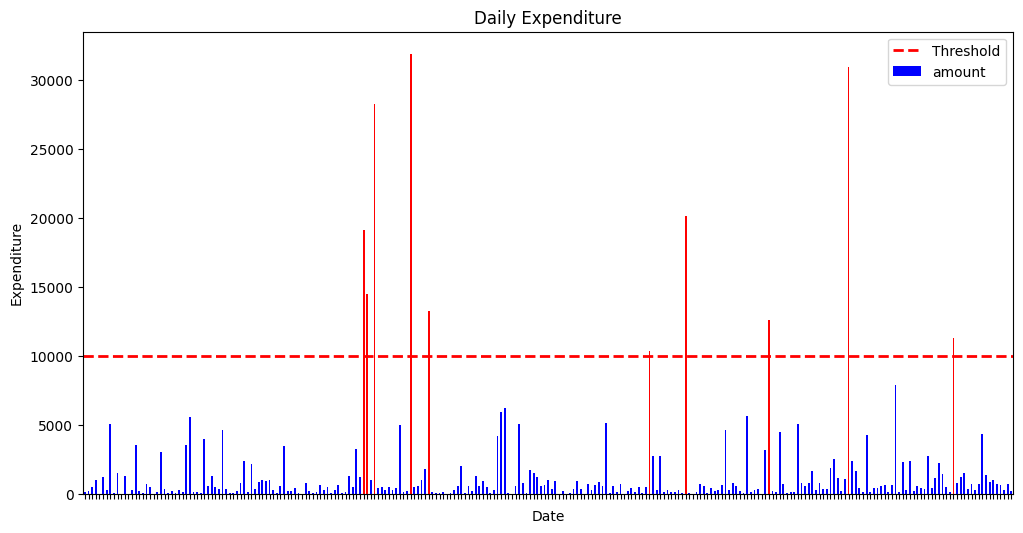

In [58]:
plt.figure(figsize=(12, 6))
bar_colors = ['b' if x <= high_expenditure else 'r' for x in daily]
daily.plot(kind='bar', color=bar_colors)
plt.axhline(y=high_expenditure, color='r', linestyle='--', linewidth=2, label='Threshold')
plt.xlabel('Date')
plt.ylabel('Expenditure')
plt.title('Daily Expenditure')
plt.gca().xaxis.set_ticklabels([])
plt.legend()
plt.show()